### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

### Load Data

In [2]:
df = pd.read_csv(r'C:\Users\Ashish Mishra\OneDrive\Desktop\Machine Learning\Dataset.csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Preprocess Data

In [3]:
# Unnecessary columns to drop
columns_to_drop = [
    'Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
    'Address', 'Locality', 'Locality Verbose', 'Longitude',
    'Latitude', 'Cuisines', 'Currency'
]

# Dropping the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Displaying the updated DataFrame
df


,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,170,No,No,No,No,4,3.7,Yellow,Good,661
9549,120,No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.shape

(9551, 10)

In [5]:
df.info

<bound method DataFrame.info of       Average Cost for two Has Table booking Has Online delivery  \
0                     1100               Yes                  No   
1                     1200               Yes                  No   
2                     4000               Yes                  No   
3                     1500                No                  No   
4                     1500               Yes                  No   
...                    ...               ...                 ...   
9546                    80                No                  No   
9547                   105                No                  No   
9548                   170                No                  No   
9549                   120                No                  No   
9550                    55                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                   No                   No            3               4.

In [6]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.duplicated().sum()

2871

In [9]:
df.dropna(inplace=True)

<Axes: xlabel='Price range'>

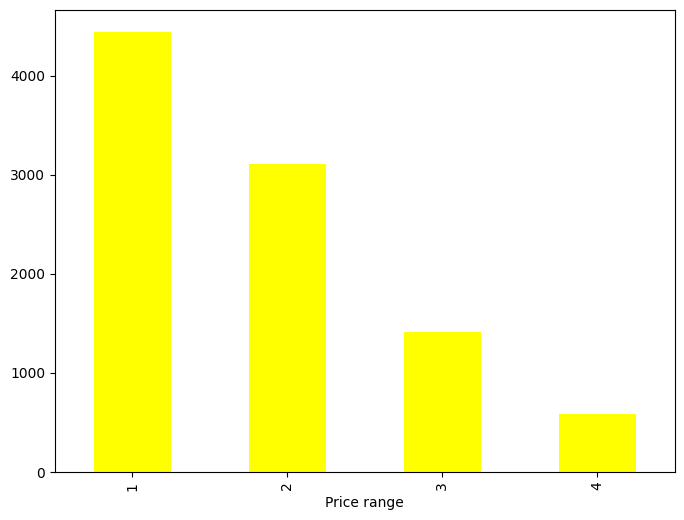

In [10]:
df['Price range'].value_counts().plot(kind='bar', color='yellow', figsize=(8, 6))


<Axes: xlabel='Aggregate rating'>

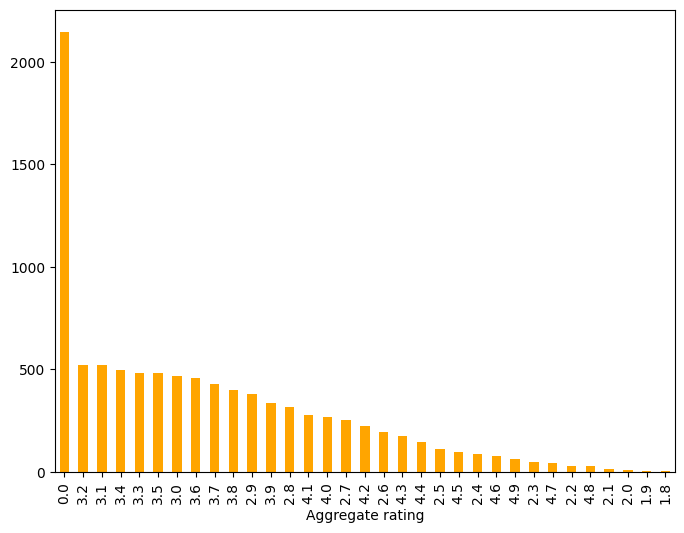

In [11]:
df['Aggregate rating'].value_counts().plot(kind='bar', color='orange', figsize=(8, 6))


<Axes: xlabel='Aggregate rating', ylabel='Count'>

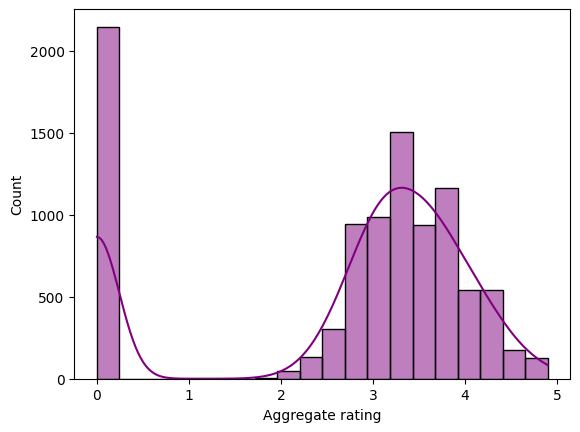

In [12]:
sns.histplot(df['Aggregate rating'], kde=True, color='purple', bins=20)

<Axes: xlabel='Price range', ylabel='Count'>

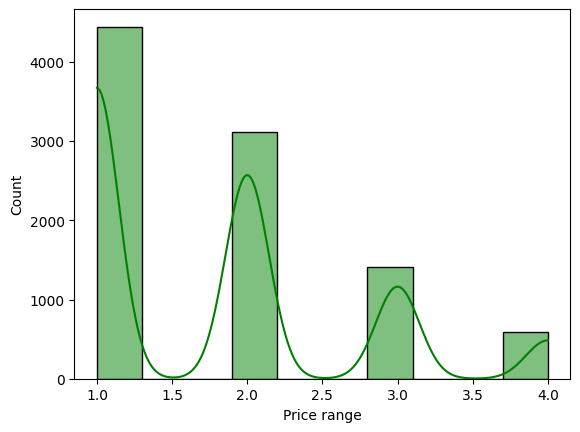

In [13]:
sns.histplot(df['Price range'], kde=True, color='green', bins=10)

<Axes: xlabel='Rating text', ylabel='Votes'>

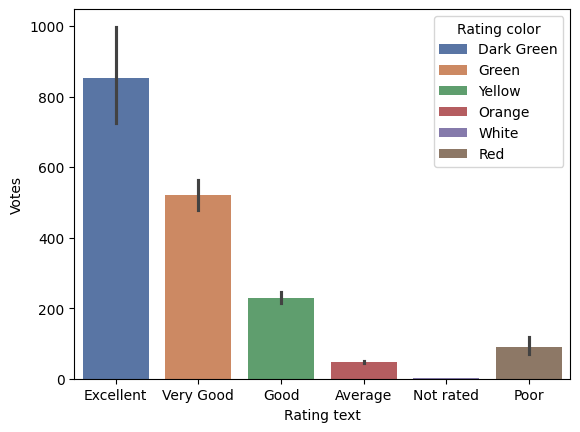

In [14]:
sns.barplot(x=df["Rating text"], y=df["Votes"], hue=df["Rating color"], palette="deep")

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

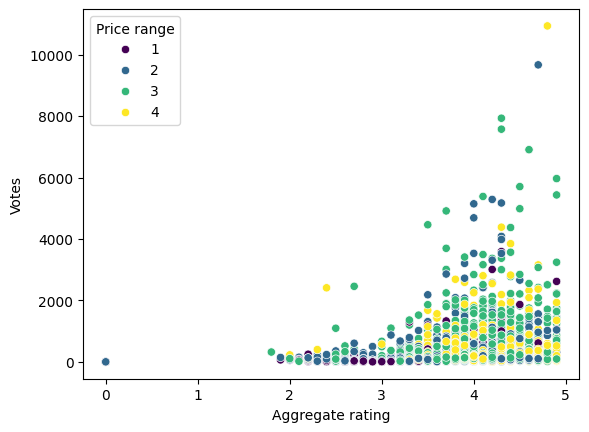

In [15]:
sns.scatterplot(x=df["Aggregate rating"], y=df["Votes"], hue=df["Price range"], palette="viridis")

In [16]:
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])

In [17]:
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


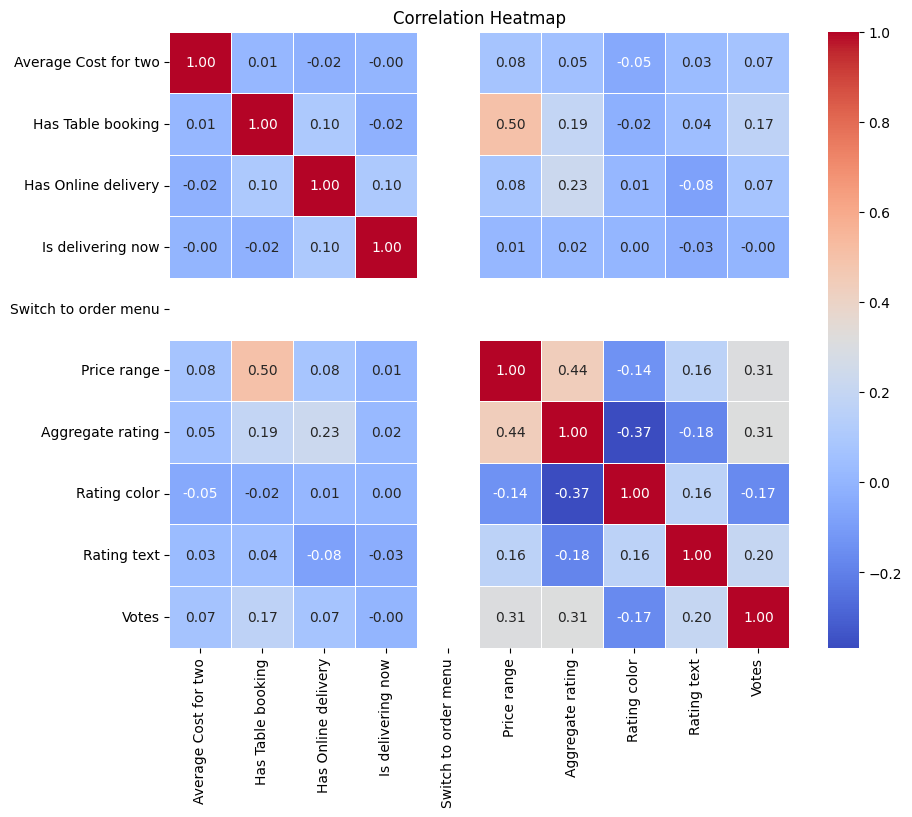

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

8696    0.0
1164    4.0
4824    3.2
7574    3.2
2961    2.3
Name: Aggregate rating, dtype: float64

In [21]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4484641996519264

In [22]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.36
R-squared (R2) Error: 0.45


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.9773426670681706

In [24]:
DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)

DTree.fit(x_train, y_train)

y_predict = DTree.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error (RMSE): {mse:.2f}")

# Calculate R-squared (R2) Error
r2 = r2_score(y_test, y_predict)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (RMSE): 0.05
R-squared (R2) Error: 0.98


### Conclusion

The performance metrics of the Decision Tree Regressor model on the test data indicate exceptional accuracy and effectiveness:

1. **Mean Squared Error (MSE)**:  
   The model achieved an MSE of **0.05**, which demonstrates very low prediction errors. This indicates that the model's predictions are highly accurate.

2. **R² Score**:  
   The R² value of **0.98** suggests that the model is highly effective at explaining and predicting the variability of the target variable. It shows that 98% of the variance in the target variable is captured by the model.

### Final Verdict:  
The Decision Tree Regressor model is performing exceptionally well, showcasing its ability to make precise and reliable predictions on the test data.
